# Solar Power Generation / Weather Data Analysis

# Introduction  


This data has been gathered at a solar power plant in India over a 34 day period. There is one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

# Research Questions
In this research the following questions were answered:  
**Can we predict the power generation for next couple of days?**

**Can we identify the need for panel cleaning/maintenance?**  

**Can we identify faulty or suboptimally performing equipment?**

# Prepare

**Data Source**  
The data that has been used has been retrieved from https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data. 

**License**  
Data files © Original Authors

**Data credibility**  
It is unclear what organization has gathered this data. The data has been automatically gathered by the system. 

In [54]:
#import os
#from kaggle.api.kaggle_api_extended import KaggleApi

#api = KaggleApi()
#api.authenticate()

#api.dataset_download_files('anikannal/solar-power-generation-data', path='solar_data', unzip=True)

#print("Dataset downloaded to: solar_data")

# Data Exploration

## Data Exploration Plant_1_Generation_Data.csv

Column descriptions Plant_1_Generation_Data.csv from the source website https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data .

**Column descriptions**

**date_time**  
Date and time for each observation. Observations recorded at 15 minute intervals. 

**plant_id**  
Plant ID - this will be common for the entire file.

**source_key**  
Source key in this file stands for the inverter id.  

**dc_power**  
Amount of DC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.  

**ac_power**  
Amount of AC power generated by the inverter (source_key) in this 15 minute interval. Units - kW.  

**daily_yield**  
Daily yield is a cumulative sum of power generated on that day, till that point in time. 

**total_yield**  
This is the total yield for the inverter till that point in time."

In [58]:
import pandas as pd
p1_gen = pd.read_csv(r"C:\Users\Frank\solar_data\Plant_1_Generation_Data.csv")

In [59]:
p1_gen

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [60]:
p1_gen.columns = p1_gen.columns.str.lower()

In [61]:
p1_gen.describe()

,plant_id,dc_power,ac_power,daily_yield,total_yield
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


plant_id has one value, as expected.  
dc_power, ac_power minimum is 0 as expected. The mean and max of ac_power is almost 10 times as low as dc_power. This unexpected, since it is expected to be around the same value. This could indicate a malfunctioning of the system. 
daily_yield values seem plausible. The standard deviation seems to be pretty high, almost equal to the mean. 
The total_yield values seems plausible.

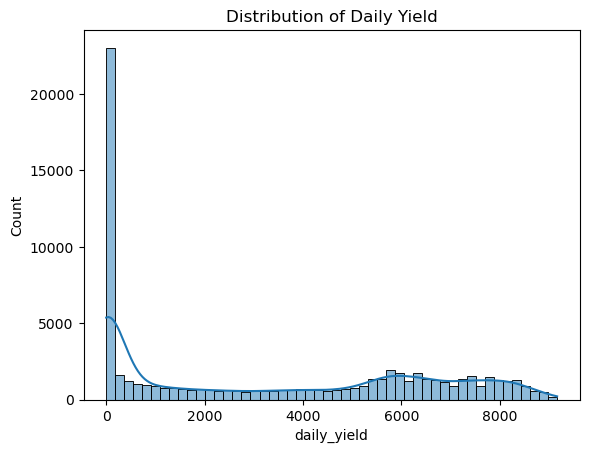

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(p1_gen['daily_yield'], kde=True, bins=50)
plt.title('Distribution of Daily Yield')
plt.show()

It is clear that the high standard deviation of the daily_yield comes from the high a mount of zero values. 

In [66]:
p1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    68778 non-null  object 
 1   plant_id     68778 non-null  int64  
 2   source_key   68778 non-null  object 
 3   dc_power     68778 non-null  float64
 4   ac_power     68778 non-null  float64
 5   daily_yield  68778 non-null  float64
 6   total_yield  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [67]:
p1_gen['date_time'] = pd.to_datetime(p1_gen['date_time'], dayfirst=True)
p1_gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  object        
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [68]:
p1_gen.isna().any()

date_time      False
plant_id       False
source_key     False
dc_power       False
ac_power       False
daily_yield    False
total_yield    False
dtype: bool

No missing values present.

In [70]:
p1_gen.head(50)

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15 00:00:00,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15 00:00:00,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15 00:00:00,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15 00:00:00,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15 00:00:00,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


Eventhough the steps of the time is per 15 min, there are 21 observations per step at the first date. This is probably because there are 21 inverters, with 21 unique source keys. Let's investigate this a bit more.

In [72]:
p1_gen['source_key'].nunique()

22

It looks like the 22 keys should be repetitive within every unique date_time variable. In the data analysis this will be investigated further on.

##  Data Exploration Plant_1_Weather_Sensor_Data.csv

Column descriptions Plant_1_Weather_Sensor_Data.csv from the source website https://www.kaggle.com/datasets/anikannal/solar-power-generation-data/data .

**date_time**  
Date and time for each observation. Observations recorded at 15 minute intervals.

 
**plant_id**  
Plant ID - this will be common for the entire file.


**source_key**  
Stands for the sensor panel id. This will be common for the entire file because there's only one sensor panel for the plant.


**ambient_temperature**  
This is the ambient temperature at the plant.   
"When it comes to solar panels, ambient temperature refers to the temperature of the air surrounding the solar panel, not the temperature of the panel itself."


**module_temperature**  
There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.


**irradiation**  
Amount of irradiation for the 15 minute interval.  
"In the context of solar panels, irradiation (or solar irradiation) refers to the amount of solar energy received per unit area over a specific period of time.  

In [76]:
p1_weather = pd.read_csv(r"C:\Users\Frank\solar_data\Plant_1_Weather_Sensor_Data.csv")
p1_weather.columns = p1_weather.columns.str.lower()
p1_weather


,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [60]:
p1_weather.describe()

,date_time,plant_id,ambient_temperature,module_temperature,irradiation
count,3182,3182.0,3182.000000,3182.000000,3182.000000
mean,2020-06-01 05:52:22.080452608,4135001.0,25.531606,31.091015,0.228313
min,2020-05-15 00:00:00,4135001.0,20.398505,18.140415,0.000000
25%,2020-05-23 22:48:45,4135001.0,22.705182,21.090553,0.000000
50%,2020-06-01 09:52:30,4135001.0,24.613814,24.618060,0.024653
75%,2020-06-09 16:56:15,4135001.0,27.920532,41.307840,0.449588
max,2020-06-17 23:45:00,4135001.0,35.252486,65.545714,1.221652
std,NaN,0.0,3.354856,12.261222,0.300836


data_time values are plausible.  
The plant_id variable is the same throughout, this makes sense because all the information is taken from a single plant.  
Since this plant is located in India, the minimum and maximum ambient and module temperature seem reasonable. The module temperature does get a lot higher than the ambient temperature. 
The standard devaition of the irradtion is higher than the mean. This is due to the high amount of 0 values, as is shown below. 

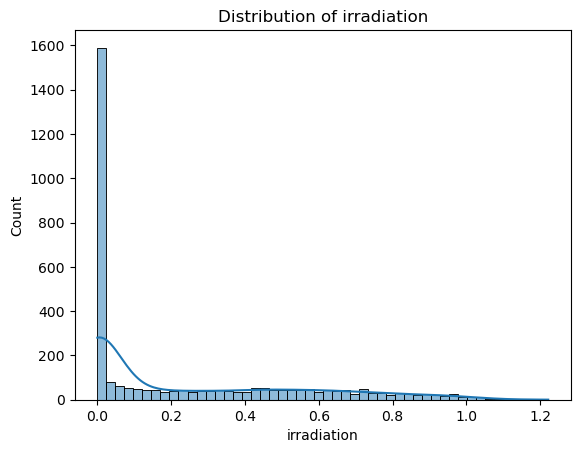

In [97]:
sns.histplot(p1_weather['irradiation'], kde=True, bins=50)
plt.title('Distribution of irradiation')
plt.show()

In [62]:
p1_weather.dtypes

date_time              datetime64[ns]
plant_id                        int64
source_key                     object
ambient_temperature           float64
module_temperature            float64
irradiation                   float64
dtype: object

In [90]:
# Convert 'date_time' column to datetime
p1_weather['date_time'] = pd.to_datetime(p1_weather['date_time'], format='%Y-%m-%d %H:%M:%S', dayfirst=False)

p1_weather

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [63]:
p1_weather.head()

,date_time,plant_id,source_key,ambient_temperature,module_temperature,irradiation
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [64]:
p1_weather['source_key'].nunique()

1

In [65]:
p1_weather.isna().any()

date_time              False
plant_id               False
source_key             False
ambient_temperature    False
module_temperature     False
irradiation            False
dtype: bool

# Data analysis

**Can we predict the power generation for next couple of days? - this allows for better grid management**  
Variables that could predict this: "dc_power", "ac_power", "ambient_temperature", "module_temperature" and "irradiation". Maybe there is a correlation between energy generated and temperature. If that is the case, one can use the weather forecast to predict the generated energy. 

**Can we identify the need for panel cleaning/maintenance?**  
Perhaps inverters which generated the least power can be identified. 

**Can we identify faulty or suboptimally performing equipment?**  
Missing data points could indicate this.


## Plant_1_Generation_Data Analysis

In the data exploration it was found that not every time stamp had values of each of the 22 source_keys.
How many of the time stamps have how many source_key values?

In [40]:
source_key_values = p1_gen['date_time'].value_counts().reset_index()
source_key_values.columns = ['date_time', 'key_counts']
source_key_values_counted = source_key_values['key_counts'].value_counts().reset_index().sort_values('key_counts', ascending=False)

total_count = source_key_values_counted['count'].sum()  # Get total sum of frequencies

source_key_values_counted['percentage'] = (source_key_values_counted['count'] / total_count) * 100 

source_key_values_counted


,key_counts,count,percentage
0,22,3057,96.801773
2,21,27,0.854972
6,20,1,0.031666
7,19,1,0.031666
4,18,14,0.443319
8,16,1,0.031666
3,14,23,0.728309
1,10,32,1.013300
5,4,2,0.063331


96.8% of the time stamps have observations of all the 22 inverters, while 3.2% have less than 22 observations. 

In [142]:
pd.set_option('display.max_rows', 10)

amount_of_keycounts_missing = source_key_values[source_key_values['key_counts'] != 22].sort_values(by = 'date_time')
display(amount_of_keycounts_missing)
pd.set_option('display.max_rows', 10)


,date_time,key_counts
3078,2020-05-15 00:00:00,21
3076,2020-05-15 00:15:00,21
3062,2020-05-15 00:30:00,21
3063,2020-05-15 00:45:00,21
3064,2020-05-15 01:15:00,21
...,...,...
3153,2020-06-06 18:15:00,10
3152,2020-06-06 18:30:00,10
3151,2020-06-06 18:45:00,10
3150,2020-06-06 19:00:00,10


Let's see how often each key is missing.

In [44]:
# Step 1: Find all source_keys (should be 22 unique ones)
all_source_keys = p1_gen['source_key'].unique()

# Step 2: Count number of source_keys per date_time
source_key_counts = p1_gen.groupby('date_time')['source_key'].nunique().reset_index()
source_key_counts = source_key_counts.rename(columns={'source_key': 'source_key_count'})

# Step 3: Find date_times with missing source_keys
missing_source_keys_dt = source_key_counts[source_key_counts['source_key_count'] < 22]['date_time']

# Step 4: For each missing date_time, find missing source_keys
missing_records = {}

for dt in missing_source_keys_dt:
    present_keys = p1_gen[p1_gen['date_time'] == dt]['source_key'].unique()
    missing_keys = set(all_source_keys) - set(present_keys)
    missing_records[dt] = missing_keys

# Step 5: Optional: Analyze how often each source_key is missing
from collections import Counter

# Flatten all missing source keys into one list
all_missing_keys = [key for keys in missing_records.values() for key in keys]
missing_key_counts_1 = Counter(all_missing_keys)

# Now missing_key_counts tells you how many times each source_key is missing
print('Amount of times each source_key is missing:')
display(missing_key_counts_1)

Amount of times each source_key is missing:


Counter({'YxYtjZvoooNbGkE': 54,
         'WRmjgnKYAwPKWDb': 40,
         '3PZuoBAID5Wc2HD': 40,
         'adLQvlD726eNBSB': 39,
         '1IF53ai7Xc0U56Y': 39,
         'zBIq5rxdHJRwDNY': 39,
         'ZoEaEvLYb1n2sOq': 35,
         'rGa61gmuvPhdLxV': 34,
         'McdE0feGgRqW7Ca': 34,
         'zVJPv84UY57bAof': 34,
         'sjndEbLyjtCKgGv': 34,
         'pkci93gMrogZuBj': 33,
         'iCRJl6heRkivqQ3': 33,
         'uHbuxQJl8lW7ozc': 33,
         'wCURE6d3bPkepu2': 32,
         'z9Y9gH1T5YWrNuG': 32,
         'ZnxXDlPa8U1GXgE': 28,
         'ih0vzX44oOqAx2f': 28,
         '7JYdWkrLSPkdwr4': 25,
         'VHMLBKoKgIrUVDU': 25,
         '1BY6WEcLGh8j5v7': 4,
         'bvBOhCH3iADSZry': 3})

How many combinations of keys are missing?

In [144]:
from collections import Counter

# Step 1: Get all unique source_keys (should be 22)
all_source_keys = set(p1_gen['source_key'].unique())

# Step 2: Count number of source_keys per date_time
source_key_counts = p1_gen.groupby('date_time')['source_key'].nunique().reset_index()
source_key_counts = source_key_counts.rename(columns={'source_key': 'source_key_count'})

# Step 3: Find date_times where source_keys are missing
missing_source_keys_dt = source_key_counts[source_key_counts['source_key_count'] < 22]['date_time']

# Step 4: For each missing date_time, find the missing source_keys
missing_records = {}

for dt in missing_source_keys_dt:
    present_keys = set(p1_gen[p1_gen['date_time'] == dt]['source_key'].unique())
    missing_keys = all_source_keys - present_keys
    missing_records[dt] = frozenset(missing_keys)  # frozenset so it can be used as a dictionary key

# Step 5: Count how often each missing combination happens
combination_counts = Counter(missing_records.values())

# Step 6: Make a readable table
combination_p1_gen = pd.DataFrame([
    {'missing_source_keys': list(keys), 'count': count}
    for keys, count in combination_counts.items()
]).sort_values('count', ascending=False)

# Display
pd.set_option('display.max_rows', 100)
display(combination_p1_gen.head(100))
display(missing_records)
display(p1_gen[p1_gen['date_time'] == "2020-05-15 00:00:00"])
pd.set_option('display.max_rows', 10)


,missing_source_keys,count
5,"[ZoEaEvLYb1n2sOq, pkci93gMrogZuBj, zBIq5rxdHJR...",31
1,"[adLQvlD726eNBSB, ZnxXDlPa8U1GXgE, 7JYdWkrLSPk...",23
0,[YxYtjZvoooNbGkE],20
3,"[WRmjgnKYAwPKWDb, 1IF53ai7Xc0U56Y, 3PZuoBAID5W...",14
10,[zBIq5rxdHJRwDNY],6
6,"[ZoEaEvLYb1n2sOq, zBIq5rxdHJRwDNY, ZnxXDlPa8U1...",2
2,"[1IF53ai7Xc0U56Y, adLQvlD726eNBSB]",1
4,"[adLQvlD726eNBSB, WRmjgnKYAwPKWDb, 1IF53ai7Xc0...",1
7,"[ZoEaEvLYb1n2sOq, YxYtjZvoooNbGkE, ZnxXDlPa8U1...",1
8,"[ZoEaEvLYb1n2sOq, 1BY6WEcLGh8j5v7, ZnxXDlPa8U1...",1


{Timestamp('2020-05-15 00:00:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 00:15:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 00:30:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 00:45:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 01:15:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 01:30:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 02:00:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 02:15:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 02:30:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 02:45:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 03:00:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 03:15:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 03:30:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 03:45:00'): frozenset({'YxYtjZvoooNbGkE'}),
 Timestamp('2020-05-15 04:00:00'): frozenset({'YxYtjZvoooNbGkE

,date_time,plant_id,source_key,dc_power,ac_power,daily_yield,total_yield
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0
5,2020-05-15,4135001,VHMLBKoKgIrUVDU,0.0,0.0,0.0,7206408.0
6,2020-05-15,4135001,WRmjgnKYAwPKWDb,0.0,0.0,0.0,7028673.0
7,2020-05-15,4135001,ZnxXDlPa8U1GXgE,0.0,0.0,0.0,6522172.0
8,2020-05-15,4135001,ZoEaEvLYb1n2sOq,0.0,0.0,0.0,7098099.0
9,2020-05-15,4135001,adLQvlD726eNBSB,0.0,0.0,0.0,6271355.0


Many of the missing source keys have the same combination of missing source keys. These are the combinations which were most present when there were source_keys missing.

In [48]:
missing_list1 =  (combination_p1_gen['missing_source_keys'].iloc[0])
missing_list2 =  (combination_p1_gen['missing_source_keys'].iloc[1])
missing_list3 =  (combination_p1_gen['missing_source_keys'].iloc[2])
missing_list4 =  (combination_p1_gen['missing_source_keys'].iloc[3])
display(missing_list1)
display(missing_list2)
display(missing_list3)
display(missing_list4)

['ZoEaEvLYb1n2sOq',
 'pkci93gMrogZuBj',
 'zBIq5rxdHJRwDNY',
 'YxYtjZvoooNbGkE',
 'iCRJl6heRkivqQ3',
 'wCURE6d3bPkepu2',
 'rGa61gmuvPhdLxV',
 'z9Y9gH1T5YWrNuG',
 'McdE0feGgRqW7Ca',
 'zVJPv84UY57bAof',
 'uHbuxQJl8lW7ozc',
 'sjndEbLyjtCKgGv']

['adLQvlD726eNBSB',
 'ZnxXDlPa8U1GXgE',
 '7JYdWkrLSPkdwr4',
 'VHMLBKoKgIrUVDU',
 'WRmjgnKYAwPKWDb',
 '1IF53ai7Xc0U56Y',
 'ih0vzX44oOqAx2f',
 '3PZuoBAID5Wc2HD']

['YxYtjZvoooNbGkE']

['WRmjgnKYAwPKWDb', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD', 'adLQvlD726eNBSB']

In [49]:
p1_gen['date_time'].value_counts()

date_time
2020-06-01 12:45:00    22
2020-06-07 00:00:00    22
2020-06-07 00:30:00    22
2020-06-07 00:45:00    22
2020-06-07 01:00:00    22
                       ..
2020-06-06 18:15:00    10
2020-06-04 18:45:00    10
2020-05-29 19:00:00    10
2020-05-25 05:30:00     4
2020-06-03 14:00:00     4
Name: count, Length: 3158, dtype: int64

In [50]:
p1_gen['date_time'].max() - p1_gen['date_time'].min()

Timedelta('33 days 23:45:00')

In [51]:
print(round(3158/4/24,3), "days have been gathered in time stamps.")


32.896 days have been gathered in time stamps.


So there should have been 34 days recorded, but some time stamps are apparently missing. In fact, over a day of time stamps are not present.

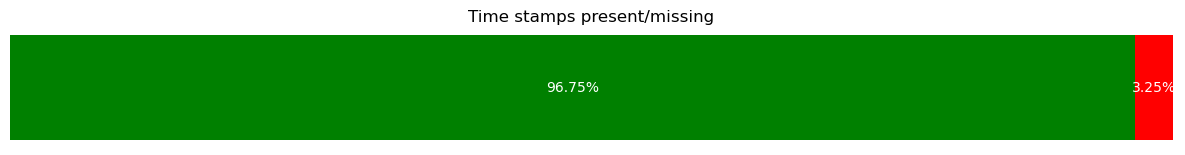

In [53]:
import matplotlib.pyplot as plt

value = 32.896
total = 34
percentage = value / total * 100
missing_percentage = 100 - percentage

plt.figure(figsize=(15, 1.5))
# Green bar for present
plt.barh(0, percentage, color='green')
# Red bar for missing
plt.barh(0, missing_percentage, left=percentage, color='red')

# Label for green area (present)
plt.text(percentage / 2, 0, f"{percentage:.2f}%", va='center', ha='center', color='white')

# Label for red area (missing)
plt.text(percentage + missing_percentage / 2, 0, f"{missing_percentage:.2f}%", va='center', ha='center', color='white')

plt.xlim(0, 100)
plt.axis('off')
plt.title('Time stamps present/missing')
plt.show()

In [146]:
# Make sure date_time is datetime type
p1_gen['date_time'] = pd.to_datetime(p1_gen['date_time'], dayfirst=False)

# Create a full datetime range with 15-minute frequency
full_range = pd.date_range(start='2020-05-15', end='2020-06-17 23:45', freq='15min')

# Find missing times by comparing full range to actual times
missing = full_range.difference(p1_gen['date_time'])

# Show result
print("Missing time stamps:", len(missing))
for item in missing:
    print (item)

Missing time stamps: 106
2020-05-15 23:15:00
2020-05-15 23:30:00
2020-05-15 23:45:00
2020-05-16 00:00:00
2020-05-16 00:15:00
2020-05-16 00:30:00
2020-05-16 00:45:00
2020-05-16 01:00:00
2020-05-16 01:15:00
2020-05-16 01:30:00
2020-05-16 01:45:00
2020-05-19 11:45:00
2020-05-19 12:00:00
2020-05-19 12:15:00
2020-05-20 13:30:00
2020-05-20 13:45:00
2020-05-20 14:00:00
2020-05-20 14:15:00
2020-05-20 14:30:00
2020-05-20 14:45:00
2020-05-20 15:00:00
2020-05-20 15:15:00
2020-05-20 15:30:00
2020-05-20 15:45:00
2020-05-20 16:00:00
2020-05-20 16:15:00
2020-05-20 16:30:00
2020-05-20 16:45:00
2020-05-20 17:00:00
2020-05-20 17:15:00
2020-05-20 23:00:00
2020-05-20 23:15:00
2020-05-20 23:30:00
2020-05-20 23:45:00
2020-05-21 00:00:00
2020-05-21 00:15:00
2020-05-21 00:30:00
2020-05-21 00:45:00
2020-05-21 01:00:00
2020-05-21 01:15:00
2020-05-21 01:30:00
2020-05-21 01:45:00
2020-05-21 02:00:00
2020-05-21 02:15:00
2020-05-21 02:30:00
2020-05-21 02:45:00
2020-05-21 03:00:00
2020-05-21 03:15:00
2020-05-21 03:3

Total missing stamps = 106
106/4 = 26.5 hours missing.

These time stamps are highly consecutive. Maybe there was some kind of error in the equipment why there wasnt anything measured. 

The biggest gaps are:

 1. From 2020-05-20 13:30 to 2020-05-20 17:15
= 3 hours 45 minutes

 2. From 2020-05-20 23:00 to 2020-05-21 07:30
= 8 hours 30 minutes

 3. From 2020-05-28 22:30 to 2020-05-29 06:00
= 7 hours 30 minutes

Total = 18h + 1h 45m = 19 hours and 45 minutes

This explains 19 hours and 45 minutes of the 26.5 hours missing.

## Plant_1_Weather_Sensor_Data Analysis

In [68]:
# Create a full datetime range with 15-minute frequency
full_range = pd.date_range(start='2020-05-15', end='2020-06-17 23:45', freq='15min')

# Find missing times by comparing full range to actual times
missing = full_range.difference(p1_weather['date_time'])

# Show result
print("Missing time stamps:", len(missing))
for item in missing:
    print (item)

Missing time stamps: 82
2020-05-15 23:15:00
2020-05-15 23:30:00
2020-05-15 23:45:00
2020-05-16 00:00:00
2020-05-16 00:15:00
2020-05-16 00:30:00
2020-05-16 00:45:00
2020-05-16 01:00:00
2020-05-16 01:15:00
2020-05-16 01:30:00
2020-05-16 01:45:00
2020-05-19 11:45:00
2020-05-19 12:00:00
2020-05-19 12:15:00
2020-05-20 13:30:00
2020-05-20 13:45:00
2020-05-20 14:00:00
2020-05-20 14:15:00
2020-05-20 14:30:00
2020-05-20 14:45:00
2020-05-20 15:00:00
2020-05-20 15:15:00
2020-05-20 15:30:00
2020-05-20 15:45:00
2020-05-20 16:00:00
2020-05-20 16:15:00
2020-05-20 16:30:00
2020-05-20 16:45:00
2020-05-20 17:00:00
2020-05-20 17:15:00
2020-05-21 00:45:00
2020-05-21 01:00:00
2020-05-21 01:15:00
2020-05-21 01:30:00
2020-05-21 01:45:00
2020-05-21 02:00:00
2020-05-21 02:15:00
2020-05-21 02:30:00
2020-05-21 02:45:00
2020-05-21 03:00:00
2020-05-21 03:15:00
2020-05-21 03:30:00
2020-05-21 03:45:00
2020-05-21 04:00:00
2020-05-21 04:15:00
2020-05-21 04:30:00
2020-05-21 04:45:00
2020-05-21 05:00:00
2020-05-21 05:15

In [69]:
print(str(round(82/4/24, 2))+ ' of 34 days are missing')

0.85 of 34 days are missing


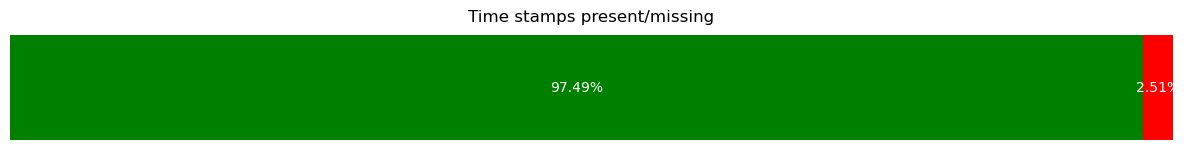

In [70]:
import matplotlib.pyplot as plt

value = 34-0.854
total = 34
percentage = value / total * 100
missing_percentage = 100 - percentage

plt.figure(figsize=(15, 1.5))
# Green bar for present
plt.barh(0, percentage, color='green')
# Red bar for missing
plt.barh(0, missing_percentage, left=percentage, color='red')

# Label for green area (present)
plt.text(percentage / 2, 0, f"{percentage:.2f}%", va='center', ha='center', color='white')

# Label for red area (missing)
plt.text(percentage + missing_percentage / 2, 0, f"{missing_percentage:.2f}%", va='center', ha='center', color='white')

plt.xlim(0, 100)
plt.axis('off')
plt.title('Time stamps present/missing')
plt.show()

Biggest time gaps:
1. 2020-05-20 13:30:00 to 2020-05-20 17:15:00 = 3 hours 45 minutes

2. 2020-05-21 00:45:00 to 2020-05-21 07:30:00 = 6 hours 45 minutes

3. 2020-05-29 02:00:00 to 2020-05-29 06:00:00 = 4 hours 0 minutes

Total Time:
3h 45m + 6h 45m + 4h 0m = 14 hours 30 minutes 
This explains 14 hours and 39 minutes out of the missing 20.4 hours.



It is clear that there are two groups of source_keys which are missing. There are very likely connected and a technical difficulty should be investigated here. 

In [148]:
print('Amount of times each source_key is missing in plant 1:')
display(missing_key_counts_1)


Amount of times each source_key is missing in plant 1:


Counter({'YxYtjZvoooNbGkE': 54,
         'WRmjgnKYAwPKWDb': 40,
         '3PZuoBAID5Wc2HD': 40,
         'adLQvlD726eNBSB': 39,
         '1IF53ai7Xc0U56Y': 39,
         'zBIq5rxdHJRwDNY': 39,
         'ZoEaEvLYb1n2sOq': 35,
         'rGa61gmuvPhdLxV': 34,
         'McdE0feGgRqW7Ca': 34,
         'zVJPv84UY57bAof': 34,
         'sjndEbLyjtCKgGv': 34,
         'pkci93gMrogZuBj': 33,
         'iCRJl6heRkivqQ3': 33,
         'uHbuxQJl8lW7ozc': 33,
         'wCURE6d3bPkepu2': 32,
         'z9Y9gH1T5YWrNuG': 32,
         'ZnxXDlPa8U1GXgE': 28,
         'ih0vzX44oOqAx2f': 28,
         '7JYdWkrLSPkdwr4': 25,
         'VHMLBKoKgIrUVDU': 25,
         '1BY6WEcLGh8j5v7': 4,
         'bvBOhCH3iADSZry': 3})

## Plant_1_Generation_And_Weather_Sensor_Data Analysis

In [189]:
p1_gw = pd.merge(p1_gen, p1_weather, left_on = 'date_time', right_on= 'date_time', how='inner') #68774
p1_gw = pd.merge(p1_gen, p1_weather, left_on = ['date_time', 'plant_id'], right_on= ['date_time', 'plant_id'], how='inner') #68774
p1_gw = p1_gw.drop(['plant_id', 'source_key_y'], axis=1)


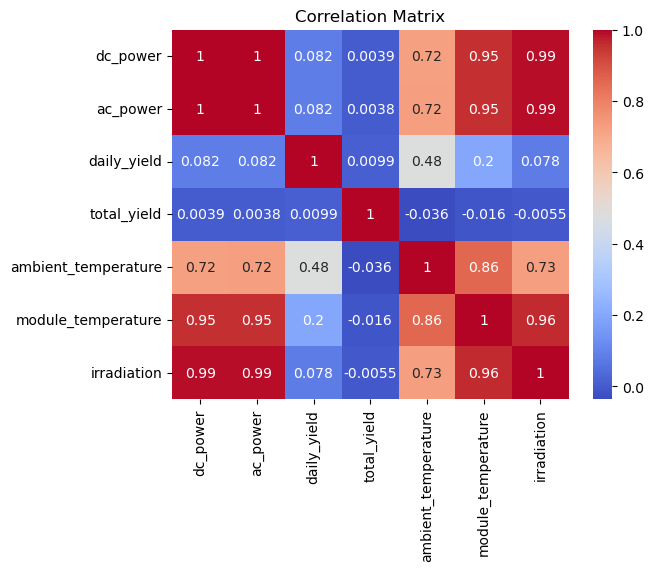

In [191]:
numeric_p1_gw = p1_gw.select_dtypes(include=['number'])
correlation_matrix = numeric_p1_gw.corr()
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dc_power and ac_power are obviously strongly related.   
Irradiation is the strongest predictor of the amount of DC and AC power delivered.   
However, ac_power and dc_power are also strongly correlated with the ambient temperature with a correlation of 0.72. One could therefore use the weather prediction to predict the output of the inverters.

Eventhough this is a correlation matrix. It is through mechanical understanding understood that irradiation influenced DC and AC power and not the other way around.

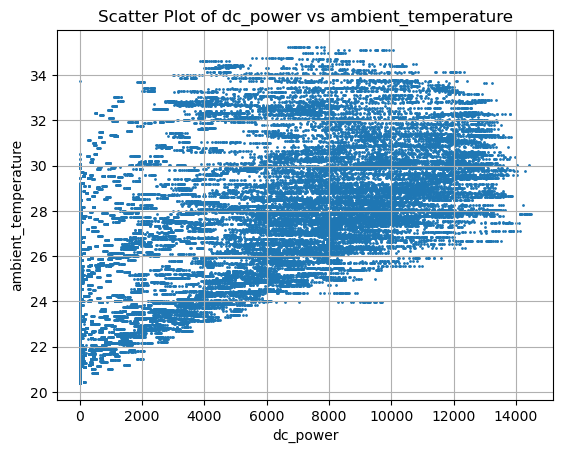

In [221]:
p1_gw['dc_power'].corr(p1_gw['ambient_temperature'])

import matplotlib.pyplot as plt

plt.scatter(p1_gw['dc_power'], p1_gw['ambient_temperature'], s=1)
plt.title('Scatter Plot of dc_power vs ambient_temperature')
plt.xlabel('dc_power')
plt.ylabel('ambient_temperature')
plt.grid(True)
plt.show()

A higher ambient temperature doesn't always give higher dc_power. Perhaps because there is a cloud in the way and there is no irradiatoin.

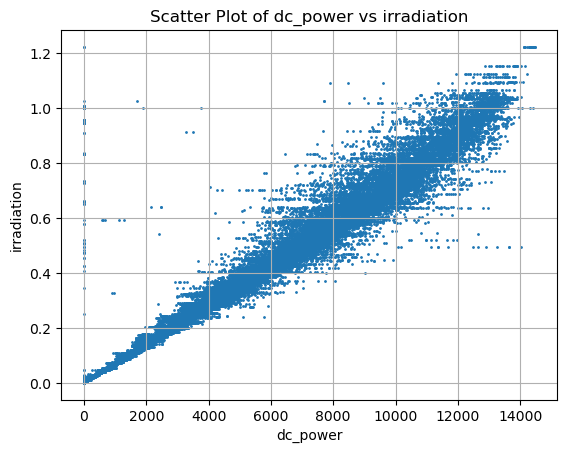

In [211]:
p1_gw['dc_power'].corr(p1_gw['irradiation'])

import matplotlib.pyplot as plt

plt.scatter(p1_gw['dc_power'], p1_gw['irradiation'], s=1)
plt.title('Scatter Plot of dc_power vs irradiation')
plt.xlabel('dc_power')
plt.ylabel('irradiation')
plt.grid(True)
plt.show()

However, irradiation is very strongly related to the dc_power.

Are there any inverters that are underperforming?

In [152]:
#total power generated per source_key (per inverter)
sum_dc_per_inverter = p1_gw.groupby('source_key_x')[['dc_power','irradiation']].agg('sum').reset_index().sort_values(by='dc_power', ascending=True)
sum_dc_per_inverter['percentage_of_max_inverter'] = round(sum_dc_per_inverter['dc_power']/sum_dc_per_inverter['dc_power'].max()*100,2)
display(sum_dc_per_inverter)

,source_key_x,dc_power,irradiation,percentage_of_max_inverter
11,bvBOhCH3iADSZry,8.925490e+06,726.421447,87.59
0,1BY6WEcLGh8j5v7,9.063716e+06,726.396941,88.94
13,ih0vzX44oOqAx2f,9.695845e+06,726.381456,95.15
19,z9Y9gH1T5YWrNuG,9.789056e+06,726.394828,96.06
9,ZoEaEvLYb1n2sOq,9.803128e+06,726.370322,96.20
...,...,...,...,...
4,McdE0feGgRqW7Ca,1.003212e+07,726.394828,98.45
2,3PZuoBAID5Wc2HD,1.004313e+07,725.359157,98.55
1,1IF53ai7Xc0U56Y,1.005594e+07,725.359157,98.68
5,VHMLBKoKgIrUVDU,1.005725e+07,726.405778,98.69


The two least productive inverters, 'bvBOhCH3iADSZry' and '1BY6WEcLGh8j5v7'  only produced 87.59% and 88.94%  of the amount of the most productive inverter. These ones need to be inspeced for some cleaning or maintenance. 
The difference in dc_power cannot be explained by a difference in irradiation or missing data. 

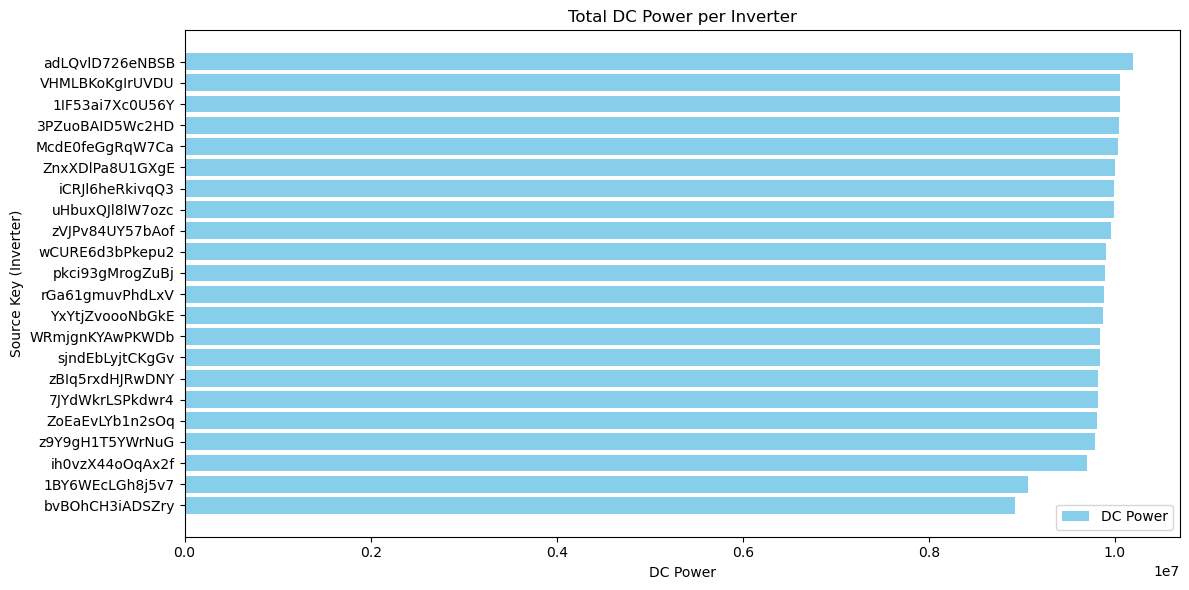

In [86]:
import matplotlib.pyplot as plt

# Assuming sum_dc_per_inverter is already defined
plt.figure(figsize=(12, 6))

# Plot DC power
plt.barh(
    sum_dc_per_inverter['source_key_x'],
    sum_dc_per_inverter['dc_power'],
    color='skyblue',
    label='DC Power'
)

plt.xlabel('DC Power')
plt.ylabel('Source Key (Inverter)')
plt.title('Total DC Power per Inverter')
plt.legend()
plt.tight_layout()
plt.show()

# Share

**Several types of malfunctions have been found within these plants.**  
Generator data:   
- AC_power values are around 10 times less than DC-power, while it should be around the same.
- 26.5 hours of missing time stamps. There are no values present during this time. 
- Time stamps with missing inverter records.
- These inverters records were usually missing within the same inverter groups. These are probably connected and maintenance needs to be carried out here. 
- Inverter 'bvBOhCH3iADSZry' and '1BY6WEcLGh8j5v7' generated significantly less power than others, respectively 87.59% and 88.94% compared to the most producing inverter. Maintenance needs to be carried out here. 

Weather data:
- 0.85 hours of missing time stamps. There are no values present during this time.
  
**Other findings:**  

Generator/Weather data:  
- The strongest predictor for ac/dc power is the irradiaton. However, ac_power and dc_power are also strongly correlated with the ambient temperature with a correlation of 0.72. One could therefore use the weather prediction to predict the output of the inverters.
- Irradiation of one day is a reasonably strong predictor for the next day, but not for days after that. 


# Act

**Can we predict the power generation for next couple of days?**   
Yes, this is possible, there is a correlation of 0.72 between ac/dc power and ambient temperature. This is a strong positive correlation, indicating that if one increases, the other one tends to increase as well. The real cause of ac/dc power is irradiation, however temperature seems to be a relative good proxy for this. By following the weather forecase one could predict the ac/dc power for the coming days.  


**Can we identify the need for panel cleaning/maintenance?**  
Inverter 'bvBOhCH3iADSZry' and '1BY6WEcLGh8j5v7' generated significantly less power than others, respectively 87.59% and 88.94% compared to the most producing inverter. There is a good chance there is cleaning or maintenance needed to fix this.

**Can we identify faulty or suboptimally performing equipment?**  
The mean and max of ac_power is almost 10 times as low as dc_power. This unexpected, since it is expected to be around the same value. This could indicate a malfunctioning of the system.   
  
Also, in the generation data 32.896 of the 34 days have been recorded, missing over one day of values. This indicates something malfunctioning within the equipment. 
The biggest gaps were:  
   
From 2020-05-20 13:30 to 2020-05-20 17:15 = 3 hours 4 5 minutes  
  
From 2020-05-20 23:00 to 2020-05-21 07:30 = 8 hours 30 minutes  
  
From 2020-05-28 22:30 to 2020-05-29 06:00 = 7 hours 30 minutes  
  

Of the time stamps which were recorded, 96.8% of the time stamps have observations of all the 22 inverters, while 3.2% have less than 22 observations. There were often a combinations of inverters observations missing. See below for more details about which inverters were often missing together.
  
  
In the weather data 0.85 of 34 days of values were missing. 
  
Biggest time gaps:  
  
2020-05-20 13:30:00 to 2020-05-20 17:15:00 = 3 hours 45 minutes  
  
2020-05-21 00:45:00 to 2020-05-21 07:30:00 = 6 hours 45 minutes  
  
2020-05-29 02:00:00 to 2020-05-29 06:00:00 = 4 hours 0 minutes  




In [90]:
print('Amount of times each source_key is missing:')
display(missing_key_counts_1)
print('When there is at least once source_key missing, these are the amount of combinations which are missing')
display(combination_p1_gen.head(100))

print('These four combinations were missing the most')
display(missing_list1)
display(missing_list2)
display(missing_list3)
display(missing_list4)

Amount of times each source_key is missing:


Counter({'YxYtjZvoooNbGkE': 54,
         'WRmjgnKYAwPKWDb': 40,
         '3PZuoBAID5Wc2HD': 40,
         'adLQvlD726eNBSB': 39,
         '1IF53ai7Xc0U56Y': 39,
         'zBIq5rxdHJRwDNY': 39,
         'ZoEaEvLYb1n2sOq': 35,
         'rGa61gmuvPhdLxV': 34,
         'McdE0feGgRqW7Ca': 34,
         'zVJPv84UY57bAof': 34,
         'sjndEbLyjtCKgGv': 34,
         'pkci93gMrogZuBj': 33,
         'iCRJl6heRkivqQ3': 33,
         'uHbuxQJl8lW7ozc': 33,
         'wCURE6d3bPkepu2': 32,
         'z9Y9gH1T5YWrNuG': 32,
         'ZnxXDlPa8U1GXgE': 28,
         'ih0vzX44oOqAx2f': 28,
         '7JYdWkrLSPkdwr4': 25,
         'VHMLBKoKgIrUVDU': 25,
         '1BY6WEcLGh8j5v7': 4,
         'bvBOhCH3iADSZry': 3})

When there is at least once source_key missing, these are the amount of combinations which are missing


,missing_source_keys,count
5,"[ZoEaEvLYb1n2sOq, pkci93gMrogZuBj, zBIq5rxdHJR...",31
1,"[adLQvlD726eNBSB, ZnxXDlPa8U1GXgE, 7JYdWkrLSPk...",23
0,[YxYtjZvoooNbGkE],20
3,"[WRmjgnKYAwPKWDb, 1IF53ai7Xc0U56Y, 3PZuoBAID5W...",14
10,[zBIq5rxdHJRwDNY],6
6,"[ZoEaEvLYb1n2sOq, zBIq5rxdHJRwDNY, ZnxXDlPa8U1...",2
2,"[1IF53ai7Xc0U56Y, adLQvlD726eNBSB]",1
4,"[adLQvlD726eNBSB, WRmjgnKYAwPKWDb, 1IF53ai7Xc0...",1
7,"[ZoEaEvLYb1n2sOq, YxYtjZvoooNbGkE, ZnxXDlPa8U1...",1
8,"[ZoEaEvLYb1n2sOq, 1BY6WEcLGh8j5v7, ZnxXDlPa8U1...",1


These four combinations were missing the most


['ZoEaEvLYb1n2sOq',
 'pkci93gMrogZuBj',
 'zBIq5rxdHJRwDNY',
 'YxYtjZvoooNbGkE',
 'iCRJl6heRkivqQ3',
 'wCURE6d3bPkepu2',
 'rGa61gmuvPhdLxV',
 'z9Y9gH1T5YWrNuG',
 'McdE0feGgRqW7Ca',
 'zVJPv84UY57bAof',
 'uHbuxQJl8lW7ozc',
 'sjndEbLyjtCKgGv']

['adLQvlD726eNBSB',
 'ZnxXDlPa8U1GXgE',
 '7JYdWkrLSPkdwr4',
 'VHMLBKoKgIrUVDU',
 'WRmjgnKYAwPKWDb',
 '1IF53ai7Xc0U56Y',
 'ih0vzX44oOqAx2f',
 '3PZuoBAID5Wc2HD']

['YxYtjZvoooNbGkE']

['WRmjgnKYAwPKWDb', '1IF53ai7Xc0U56Y', '3PZuoBAID5Wc2HD', 'adLQvlD726eNBSB']